In [171]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank-additional-full.csv', sep=';', encoding='Windows-1251')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,01.янв,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,01.янв,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,01.янв,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,01.янв,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,01.янв,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Bank client data:

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null object
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null object
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(3), int64(5), object(13)
memory usage

In [122]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [10]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [11]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [12]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [13]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [14]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [16]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [18]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [19]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [22]:
df['emp.var.rate'].unique()

array(['01.янв', '01.апр', '-0.1', '-0.2', '-1.8', -1.8, -2.9, -3.4, -3.0,
       -1.7, -1.1], dtype=object)

In [24]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

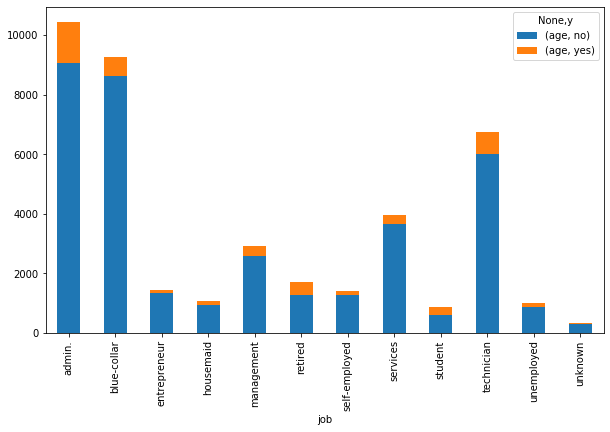

In [200]:
# посмотрим распределение категорий обзваниемых людей по профессиям
df_joby = df.groupby(['job', 'y']).count().loc[:, ['age']]
df_joby.unstack().plot(kind='bar', rot=90, stacked=True, figsize=(10, 6))

как видим из графика среди обзваниваемых в большей степени преобладют в порядке убывания административные сотрудники, голубые-воротнички (blue-collar), техники, работники сервисных услуг, управленцы (!). Меньше всех очеивдно обзванивались бузработные, студенты, домработники. 

<BarContainer object of 12 artists>

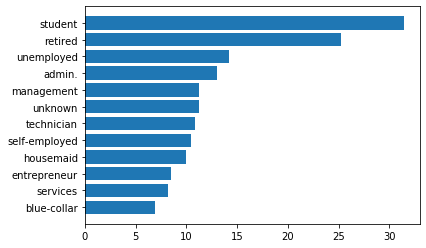

In [120]:
#доля подписок на услугу (кредит) в зависимости от категории рода деятельности
df1 = df_unst.reset_index()
df1['ratio'] = df1['age']['yes']/(df1['age']['yes'] + df1['age']['no'])*100
df2 = df1.loc[:, ['job', 'ratio']].sort_values(by='ratio')
plt.barh(df2['job'], df2['ratio'])

Не смотря на то, что категория студентов и пенсионеров меньше всего обзванивается, доля успешных продаж кредитов им выше всех.

In [142]:
#какая категория людей ст точки зрения семейного положения больше берет кредитов
df_mary = df.groupby(['marital', 'y']).count().loc[:, ['age']].unstack()
df_mary['ratio'] = df_mary['age']['yes']/(df_mary['age']['yes'] + df_mary['age']['no'])*100
df_mary = df_mary.loc[:, ['marital', 'ratio']].reset_index()
df_mary

,marital,ratio
y,,
0,divorced,10.320902
1,married,10.157253
2,single,14.004149
3,unknown,15.000000


<BarContainer object of 4 artists>

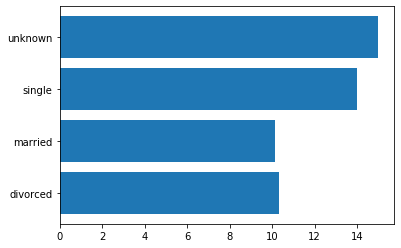

In [218]:
plt.barh(df_mary['marital'], df_mary['ratio'])

больше соглашаются на кредит 14% люди без семейного положения. 

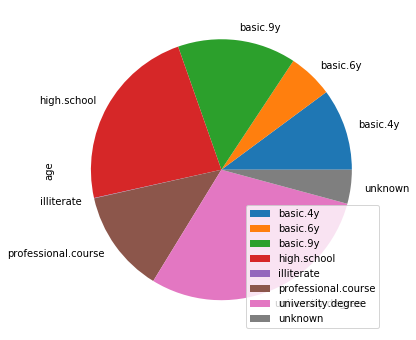

In [196]:
#посмотрим соотвношение образования у обзваниваемых 
df_edu = df.groupby('education').count().loc[:, ['education', 'age']]
df_edu.plot(kind = 'pie', y = 'age', figsize=(6, 6))

примерно треть всех обзваниваемых имеют высшее образование. добрая половина лишь окончила школу. все остальные видимо проходили курсы (Нетологии наверное :) )

In [201]:
df.corr()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,0.000857,0.129372,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,0.005312,-0.008173,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.127836,-0.013733,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.078889,-0.091342,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.203130,-0.050936,-0.501333
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,1.000000,0.058986,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.058986,1.000000,0.100513
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.522034,0.100513,1.000000


корелляции между числовми данными нет.

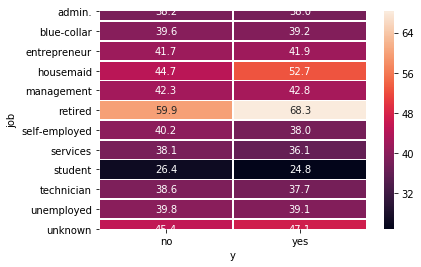

In [216]:
res = df.pivot_table(
    index = 'job',
    columns = 'y',
    values = 'age',
    aggfunc=np.mean).applymap(float)
res
sns.heatmap(res, annot=True, fmt=".1f", linewidths=.5)

тепловая карта показывает, что средний возраст обзвниваемых студентов (судя по возрасту плохо учились и оставались на второй год)  26 (сказали нет) или 24 лет (согласились на кредит). Сердний возраст в остальных категориях около 40 лет. те кто чуть помолоде более сговорчивые. Самые сговорчивые пенсионеры находятся в возрасте 70 лет. 